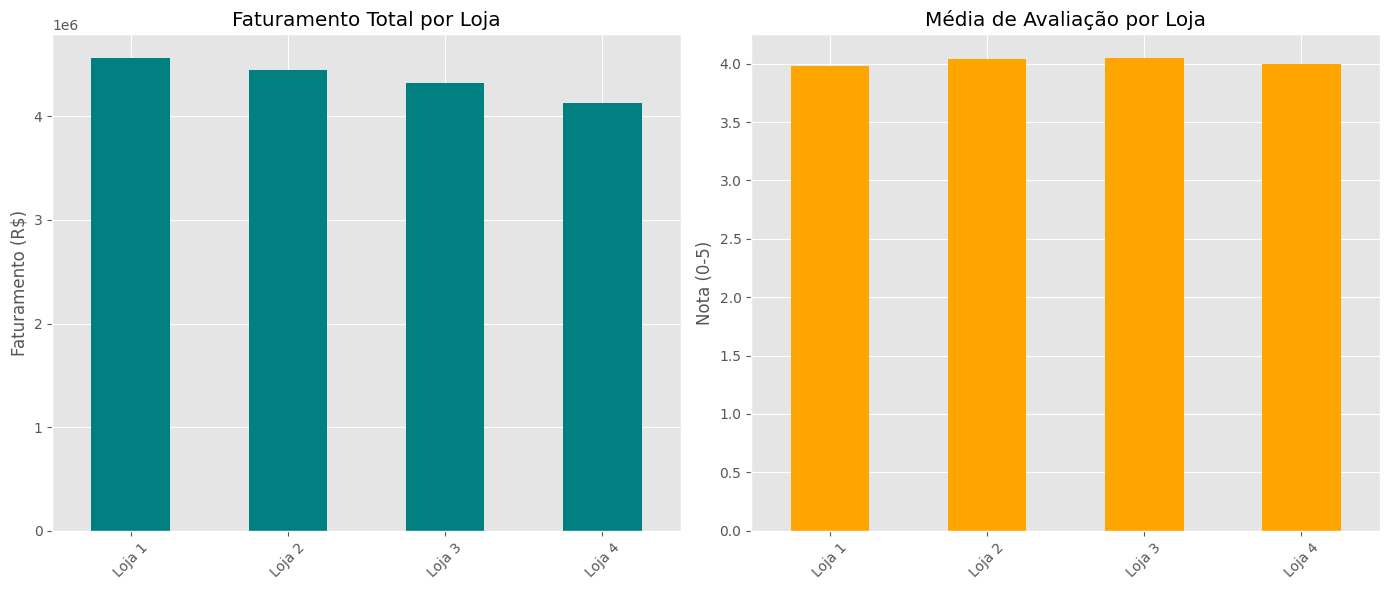

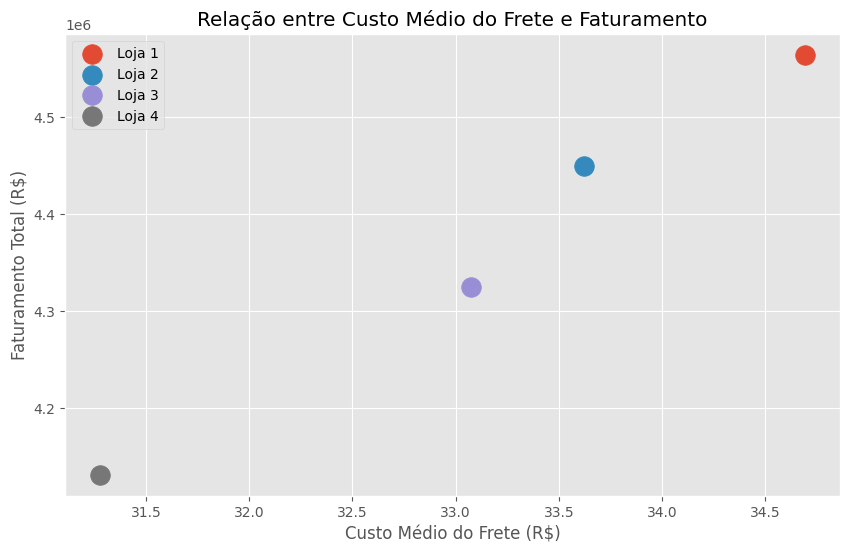

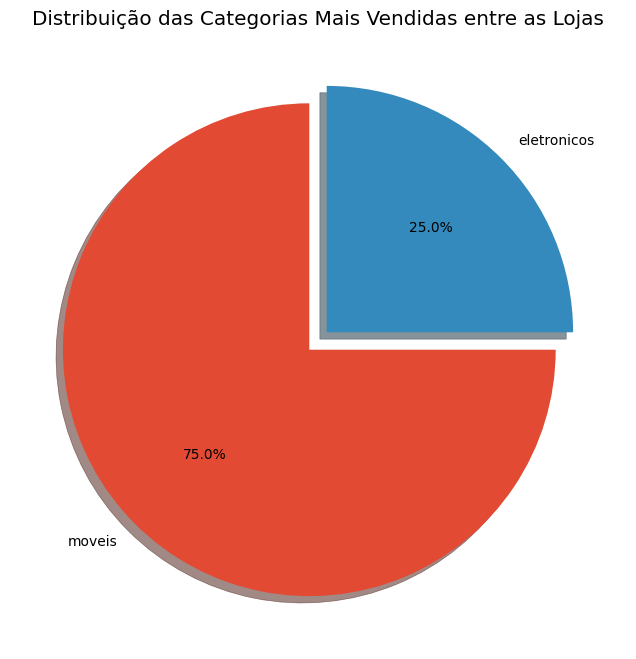


RESULTADOS DA ANÁLISE:

Ranking das Lojas (da pior para a melhor):
1º lugar: Loja 4 - Score: 0.28
2º lugar: Loja 1 - Score: 0.50
3º lugar: Loja 3 - Score: 0.62
4º lugar: Loja 2 - Score: 0.68

Detalhes da loja com pior desempenho:
Nome: Loja 4
Faturamento: R$4,131,753.14
Avaliação média: 4.0/5
Custo médio frete: R$31.28
Categoria mais vendida: moveis
Top 3 produtos: Dashboards com Power BI, Cama box, Faqueiro


In [6]:
# Importando bibliotecas necessárias
import pandas as pd              # Para manipulação e análise de dados em tabelas (DataFrames)
import matplotlib.pyplot as plt  # Para criar gráficos
import numpy as np               # Para operações numéricas (não muito usado aqui, mas útil)

# Definindo estilo dos gráficos do matplotlib
plt.style.use('ggplot')          # Usando o estilo 'ggplot' para gráficos mais bonitos e claros

# URLs dos arquivos CSV das lojas hospedados no GitHub
urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Criando um dicionário com DataFrames para cada loja
# pd.read_csv lê o CSV diretamente da URL
lojas = {nome: pd.read_csv(url) for nome, url in urls.items()}

# Criando um dicionário vazio para armazenar métricas de cada loja
metricas = {}

# Loop para analisar cada loja separadamente
for nome, dados in lojas.items():
    metrica_loja = {}  # Dicionário temporário para guardar métricas da loja atual

    # Ajuste para nome da coluna de quantidade (alguns CSVs usam nomes diferentes)
    if 'Quantidade' in dados.columns:
        coluna_qtd = 'Quantidade'
    else:
        coluna_qtd = 'Quantidade de parcelas'

    # 1. Calculando faturamento total da loja
    # Multiplicamos preço pelo número de unidades vendidas (ou parcelas)
    dados['preco_total'] = dados['Preço'] * dados[coluna_qtd]
    metrica_loja['faturamento_total'] = dados['preco_total'].sum()  # Soma de todas as vendas

    # 2. Média de avaliação das compras da loja
    metrica_loja['media_avaliacao'] = dados['Avaliação da compra'].mean()

    # 3. Custo médio do frete
    metrica_loja['custo_medio_frete'] = dados['Frete'].mean()

    # 4. Produtos mais vendidos (top 3) e menos vendidos (bottom 3)
    produtos_vendidos = dados.groupby('Produto')[coluna_qtd].sum().sort_values(ascending=False)
    metrica_loja['top3_produtos'] = produtos_vendidos.head(3).index.tolist()  # Top 3 produtos
    metrica_loja['pior3_produtos'] = produtos_vendidos.tail(3).index.tolist()  # 3 piores produtos

    # 5. Categoria mais popular
    categorias_vendidas = dados.groupby('Categoria do Produto')[coluna_qtd].sum().sort_values(ascending=False)
    metrica_loja['categoria_mais_vendida'] = categorias_vendidas.idxmax()  # Categoria mais vendida
    metrica_loja['percentual_categoria_top'] = (categorias_vendidas.max() / categorias_vendidas.sum()) * 100

    # Armazenando métricas da loja no dicionário principal
    metricas[nome] = metrica_loja

# Criando DataFrames para comparação de métricas entre lojas
df_faturamento = pd.DataFrame({loja: [metricas[loja]['faturamento_total']] for loja in lojas})
df_avaliacao = pd.DataFrame({loja: [metricas[loja]['media_avaliacao']] for loja in lojas})
df_frete = pd.DataFrame({loja: [metricas[loja]['custo_medio_frete']] for loja in lojas})

# --------------------------
# Gráfico 1: Comparativo de faturamento e avaliação
# --------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Criando dois gráficos lado a lado

# Gráfico de barras do faturamento
df_faturamento.T.plot(kind='bar', ax=ax1, color='teal', legend=False)
ax1.set_title('Faturamento Total por Loja')
ax1.set_ylabel('Faturamento (R$)')
ax1.tick_params(axis='x', rotation=45)  # Rotaciona nomes das lojas para melhor visualização

# Gráfico de barras da avaliação média
df_avaliacao.T.plot(kind='bar', ax=ax2, color='orange', legend=False)
ax2.set_title('Média de Avaliação por Loja')
ax2.set_ylabel('Nota (0-5)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Ajusta espaçamento dos gráficos
plt.show()  # Exibe os gráficos

# --------------------------
# Gráfico 2: Relação entre custo médio do frete e faturamento
# --------------------------
plt.figure(figsize=(10, 6))
for loja in lojas:
    plt.scatter(metricas[loja]['custo_medio_frete'],  # eixo X = frete médio
                metricas[loja]['faturamento_total'],  # eixo Y = faturamento
                s=200,  # tamanho dos pontos
                label=loja)  # legenda
plt.title('Relação entre Custo Médio do Frete e Faturamento')
plt.xlabel('Custo Médio do Frete (R$)')
plt.ylabel('Faturamento Total (R$)')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------
# Gráfico 3: Distribuição das categorias mais vendidas
# --------------------------
categorias_mais_vendidas = [metricas[loja]['categoria_mais_vendida'] for loja in lojas]  # Lista de categorias top
contagem_categorias = pd.Series(categorias_mais_vendidas).value_counts()  # Conta quantas vezes cada categoria aparece

explode = [0.05] * len(contagem_categorias)  # Define "explode" dinâmico para cada fatia do gráfico de pizza
contagem_categorias.plot(kind='pie',
                         figsize=(8, 8),
                         autopct='%1.1f%%',  # Exibe percentual
                         startangle=90,  # Rotaciona início do gráfico
                         explode=explode,  # Destaca cada fatia
                         shadow=True)  # Sombra para efeito visual
plt.title('Distribuição das Categorias Mais Vendidas entre as Lojas')
plt.ylabel('')  # Remove label do eixo Y
plt.show()

# --------------------------
# Calculando score para ranking das lojas
# --------------------------
for loja in metricas:
    # Normalizando métricas entre 0 e 1 para comparabilidade
    fat_norm = (metricas[loja]['faturamento_total'] - df_faturamento.values.min()) / (df_faturamento.values.max() - df_faturamento.values.min())
    aval_norm = (metricas[loja]['media_avaliacao'] - df_avaliacao.values.min()) / (df_avaliacao.values.max() - df_avaliacao.values.min())
    frete_norm = 1 - ((metricas[loja]['custo_medio_frete'] - df_frete.values.min()) / (df_frete.values.max() - df_frete.values.min()))  # menor frete = melhor

    # Score ponderado: 50% faturamento, 30% avaliação, 20% frete
    metricas[loja]['score'] = (fat_norm * 0.5) + (aval_norm * 0.3) + (frete_norm * 0.2)

# Ordenando lojas do pior para o melhor
ranking = sorted(metricas.items(), key=lambda x: x[1]['score'])

# --------------------------
# Exibindo resultados finais
# --------------------------
print("\nRESULTADOS DA ANÁLISE:\n")
print("Ranking das Lojas (da pior para a melhor):")
for i, (loja, dados) in enumerate(ranking, 1):
    print(f"{i}º lugar: {loja} - Score: {dados['score']:.2f}")

# Detalhes da loja com pior desempenho
pior_loja = ranking[0][0]
print("\nDetalhes da loja com pior desempenho:")
print(f"Nome: {pior_loja}")
print(f"Faturamento: R${metricas[pior_loja]['faturamento_total']:,.2f}")
print(f"Avaliação média: {metricas[pior_loja]['media_avaliacao']:.1f}/5")
print(f"Custo médio frete: R${metricas[pior_loja]['custo_medio_frete']:.2f}")
print(f"Categoria mais vendida: {metricas[pior_loja]['categoria_mais_vendida']}")
print(f"Top 3 produtos: {', '.join(metricas[pior_loja]['top3_produtos'])}")
